In [21]:
from project.dataset import Dataset
import pandas as pd
import nibabel as nib

In [22]:
ds = Dataset()

### Load all cases


generate slice count for each case using the list comprehension `slices`


In [23]:
mri = ds.load_raw_mri()
stripped = ds.load_skullstripped_mri()
masks = ds.load_cmb_masks()
slices = [nib.load(x).get_fdata().shape[2] for x in mri]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1

create `standard_df` for the unprocessed data


In [24]:
standard_df = pd.DataFrame({
    'mri': mri,
    'masks': masks,
    'stripped': stripped,
    'slices': slices,
})

In [25]:
sample_mask = nib.load(masks[0]).get_fdata()
sample_mask

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [26]:
sample_mask.shape

(512, 512, 35)

In [27]:
sample_mask[:, :, 0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

function to generate all the target slices for each case


In [28]:
def generate_target_slice(mri, masks, stripped, slices, cohort=0):
    if len(mri) != len(masks):
        print(f'Unequal amount of mri cases to cmb masks\t{len(mri)} to {len(masks)}')
    if len(mri) != len(slices):
        print(f'Unequal amount of mri cases to case slice counts\t{len(mri)} to {len(slices)}')

    # ls = [(mri[i], masks[i], target) for i in range(len(mri)) for target in range(slices[i])]
    ls = []
    
    for i in range(len(mri)):
        maxval = nib.load(mri[i]).get_fdata().max()
        mask_data = nib.load(masks[i]).get_fdata()
        has_microbleed_case = 1 if mask_data.max() > 0 else 0
            
        for target in range(slices[i]):
            has_microbleed_slice = 1 if mask_data[:, :, target].max() > 0 else 0
            ls.append((
                mri[i], 
                masks[i], 
                stripped[i],
                target, 
                has_microbleed_case, 
                has_microbleed_slice,
                cohort,
                maxval,
                slices[i]
            ))
            
    df = pd.DataFrame(ls, columns=[
        'mri',
        'masks', 
        'stripped',
        'target', 
        'has_microbleed_case', 
        'has_microbleed_slice',
        'cohort',
        'max_value',
        'slices'
    ])
    # ls = [(case, target) for case, slices in zip(case, slices) for target in range(slices)]
    return df

In [29]:
df = generate_target_slice(mri, masks, stripped, slices)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1

### Load per cohort


In [31]:
ch1mri = ds.load_raw_mri(1)
ch1masks = ds.load_cmb_masks(1)
ch1stripped = ds.load_skullstripped_mri(1)
ch1slices = [nib.load(x).get_fdata().shape[2] for x in ch1mri]

ch1df = generate_target_slice(ch1mri, ch1masks, ch1stripped, ch1slices, cohort=1)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1

In [32]:
ch2mri = ds.load_raw_mri(2)
ch2masks = ds.load_cmb_masks(2)
ch2stripped = ds.load_skullstripped_mri(2)
ch2slices = [nib.load(x).get_fdata().shape[2] for x in ch2mri]

ch2df = generate_target_slice(ch2mri, ch2masks, ch2stripped, ch2slices, cohort=2)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1

In [35]:
ch3mri = ds.load_raw_mri(3)
ch3masks = ds.load_cmb_masks(3)
ch3stripped = ds.load_skullstripped_mri(3)
ch3slices = [nib.load(x).get_fdata().shape[2] for x in ch3mri]

ch3df = generate_target_slice(ch3mri, ch3masks, ch3stripped, ch3slices, cohort=3)

### Check if all data except cohort number matches with the old version `df`


In [36]:
ff = pd.concat([ch1df, ch2df, ch3df], ignore_index=True)

In [37]:
check = df == ff

<Axes: >

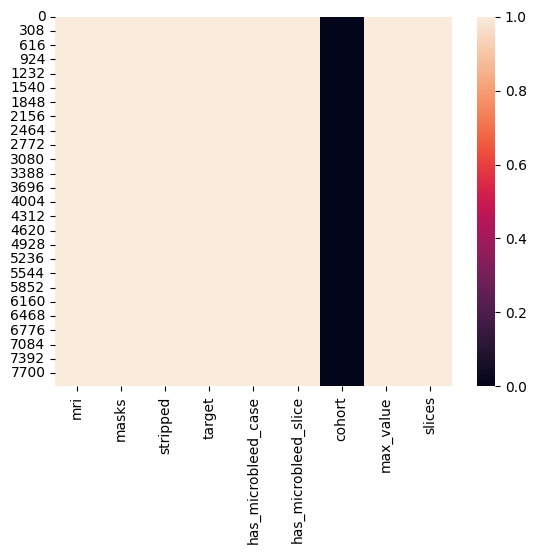

In [38]:
import seaborn as sns

sns.heatmap(check)

if all is well and good, make `ff` the new `df`


In [39]:
df = ff

---


In [40]:
df.sample(5)

,mri,masks,stripped,target,has_microbleed_case,has_microbleed_slice,cohort,max_value,slices
4117,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,84,0,0,2,70006.132812,192
2711,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,22,1,0,2,65800.148438,192
3381,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,116,1,1,2,79978.382812,192
6203,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,58,0,0,2,74729.734375,192
5832,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,d:\Github\Thesis and ML Project\Dataset\VALDO_...,71,1,0,2,68490.343750,192


This should return none because this is invalid


In [41]:
df[(df['has_microbleed_case'] == 0) & (df['has_microbleed_slice'] == 1)]

,mri,masks,stripped,target,has_microbleed_case,has_microbleed_slice,cohort,max_value,slices


Check how many cases have microbleeds


In [42]:
len(df['masks'].drop_duplicates())

72

In [43]:
df[df['has_microbleed_case'] == 1]['masks'].nunique()

50

In [44]:
ar = df.groupby('mri').target.max()
ar

mri
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-101_space-T2S_desc-masked_T2S.nii.gz    34
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-102_space-T2S_desc-masked_T2S.nii.gz    34
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-103_space-T2S_desc-masked_T2S.nii.gz    34
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-104_space-T2S_desc-masked_T2S.nii.gz    34
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-105_space-T2S_desc-masked_T2S.nii.gz    34
                                                                                                              ..
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-323_space-T2S_desc-masked_T2S.nii.gz    38
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-324_space-T2S_desc-masked_T2S.nii.gz    38
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-325_space-T2S_desc-mas

In [45]:
arr = standard_df.groupby('mri').slices.max()
ar

mri
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-101_space-T2S_desc-masked_T2S.nii.gz    34
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-102_space-T2S_desc-masked_T2S.nii.gz    34
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-103_space-T2S_desc-masked_T2S.nii.gz    34
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-104_space-T2S_desc-masked_T2S.nii.gz    34
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-105_space-T2S_desc-masked_T2S.nii.gz    34
                                                                                                              ..
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-323_space-T2S_desc-masked_T2S.nii.gz    38
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-324_space-T2S_desc-masked_T2S.nii.gz    38
d:\Github\Thesis and ML Project\Dataset\VALDO_dataset\mri_t2s_dir\sub-325_space-T2S_desc-mas

### Check if all slices match with the raw dataframe count


In [46]:
(ar == (arr - 1)).all()

True

### Export as metadata


In [47]:
df.to_csv('targets_kess.csv', index=False)